# Unconstrained optimization

```{contents}
:local:
```

In this chapter, we'll cover how to apply `scipy.optimize.minimize` to unconstrained optimization problems. As a reminder, unconstrained optimization considers:

```{math}
:label: unconstrained_optimizatino

\mathop {\min }\limits_x f\left( x \right)
```
with $x$ the design variable of length $n$



## Method
In this course, we're making use of the function `scipy.optimize.minimize`. The documentation of this function is available here: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html. In this course we'll cover only the relevant parts.

For unconstrained optimization we need to run at least `scipy.optimize.minimize(fun, x0, ...)` with:
- `fun`, the objective function $f(x)$ to be minimized. `fun` is a callable. The `scipy.optmize.minimize` function takes care of defining and inputing our design variable $x$.
- `x0`, the initial guess for our design variable $x$. It needs to be a `ndarray` with length $n$

The function `scipy.optimize.minimize` outputs an object `scipy.optimize.OptimizeResult`. with:
- `scipy.optimize.OptimizeResult.x` the optimized solution of the design variable `x`. It is a `ndarray` with length $n$
- `scipy.optimize.OptimizeResult.success`, a indication whether or not the optimizer was executed succesfully. It is a `bool`, indicating `True` or `False`
- `scipy.optimize.OptimizeResult.message`, a message describing the cause of termination of the optimizatino algorithm. It is a `str`.
- `scipy.optimize.OptimizeResult.fun`, the values of the optimized objective function $f$. It is a `int` or `float`
- `scipy.optimize.OptimizeResult.nit`, the number of iteration performed by the optimizer. It is a `int`

```{Admonition} Test yourself
:class: Note
<iframe src="https://tudelft.h5p.com/content/1292011279864402367/embed" aria-label="Example 1_method" width="1088" height="637" frameborder="0" allowfullscreen="allowfullscreen" allow="autoplay *; geolocation *; microphone *; camera *; midi *; encrypted-media *"></iframe><script src="https://tudelft.h5p.com/js/h5p-resizer.js" charset="UTF-8"></script>
```

## Example 1

### Problem
It is desired to determine the number of bathymetry maps $n$ of a local area that should be produced to maximize the profit of a company. The total cost of production and distribution is €$75$ per unit $n$. The revenues are proportional to the number of units multiplied by its price: $Revenues = n \cdot Price $

The demand depends on the price ($Price = 150 - 0.01n^2$), as shown in the graph:

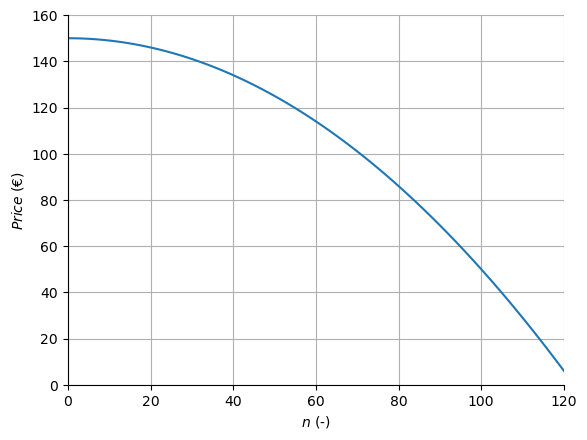

In [17]:
import numpy as np
import matplotlib.pylab as plt
n = np.linspace(0,120,100)
price = 150 - 0.01 * n**2
plt.plot(n,price)
plt.xlabel('$n$ (-)')
plt.ylabel('$Price$ (€)')
plt.ylim(0,160)
plt.xlim(0,120)
ax = plt.gca()
ax.grid(True, which='both')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

The profit can be estimated as the revenues minus the total costs.

### Model
The function for the profit can be found by combining the relations in the problem statement. However, this is the profit which should be maximized. To turn this into a minimization problem, the profit can be multiplied with $-1$. The final model of this problem results in:

```{math}
:label: unconstrained_optimization_problem

\mathop {\min }\limits_n \left(75n - \left( 150 - 0.01n^2 \right) n \right)
```

```{Admonition} Test yourself
:class: Note
<iframe src="https://tudelft.h5p.com/content/1292011274373208217/embed" aria-label="Example 1_convex" width="1088" height="637" frameborder="0" allowfullscreen="allowfullscreen" allow="autoplay *; geolocation *; microphone *; camera *; midi *; encrypted-media *"></iframe><script src="https://tudelft.h5p.com/js/h5p-resizer.js" charset="UTF-8"></script>
```

```{Admonition} Test yourself
:class: Note
<iframe src="https://tudelft.h5p.com/content/1292011276871538227/embed" aria-label="Example 1_convex" width="1088" height="637" frameborder="0" allowfullscreen="allowfullscreen" allow="autoplay *; geolocation *; microphone *; camera *; midi *; encrypted-media *"></iframe><script src="https://tudelft.h5p.com/js/h5p-resizer.js" charset="UTF-8"></script>
```


### Method

This model is described using `scipy.optimize.minimize` according to the [standard structure in this course](./Python_start_3.ipynb)


#### Importing libraries

In [18]:
import scipy as sp 
import numpy as np
import matplotlib.pylab as plt

#### Defining the variables
There are very few variables in this problem. In fact, the only variable we have to specify is the initial guess for the optimization algorithm. The objective function will be treated later.
The length of $n$ doesn't have to be specified.

In [19]:
n0 = 20

```{Admonition} Test yourself
:class: Note
<iframe src="https://tudelft.h5p.com/content/1292011310223381757/embed" aria-label="Problem 1 variables" width="1088" height="637" frameborder="0" allowfullscreen="allowfullscreen" allow="autoplay *; geolocation *; microphone *; camera *; midi *; encrypted-media *"></iframe><script src="https://tudelft.h5p.com/js/h5p-resizer.js" charset="UTF-8"></script>
```

#### Defining the objective function
In the objective function, the formula given in the model description can be inserted. Or, each individual step can be calculated on a seperate line. Again, note that the profit is multiplied with $-1$ to maximize the profit in the minimization formulation.
This results in:

In [20]:
def negprofit(n):
    price = 150 - 0.01 * n**2
    revenues = price * n
    totalcost = 75 * n
    profit = revenues - totalcost
    return -profit

#### Solving the problem
Now, the problem can be solved. The result is stored in the variables `result` which is printed.

In [21]:
result = sp.optimize.minimize(negprofit,n0)
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -2499.9999999998727
        x: [ 5.000e+01]
      nit: 8
      jac: [ 0.000e+00]
 hess_inv: [[ 3.503e-01]]
     nfev: 22
     njev: 11


```{Admonition} Test yourself
:class: Note
<iframe src="https://tudelft.h5p.com/content/1292011319959180647/embed" aria-label="Example 1 Solving" width="1088" height="637" frameborder="0" allowfullscreen="allowfullscreen" allow="autoplay *; geolocation *; microphone *; camera *; midi *; encrypted-media *"></iframe><script src="https://tudelft.h5p.com/js/h5p-resizer.js" charset="UTF-8"></script>
```

#### Postprocessing
As this case is only one-dimensional and the potential range of values is limited, we can easily check this answer by an exhaustive search, evaluating all possible values for $n$. The plot below shows the $\text{negative profit}$ for $0<n<100$. It shows a clear minimum which coincides with the minimum found by `scipy.optimize.minimize`

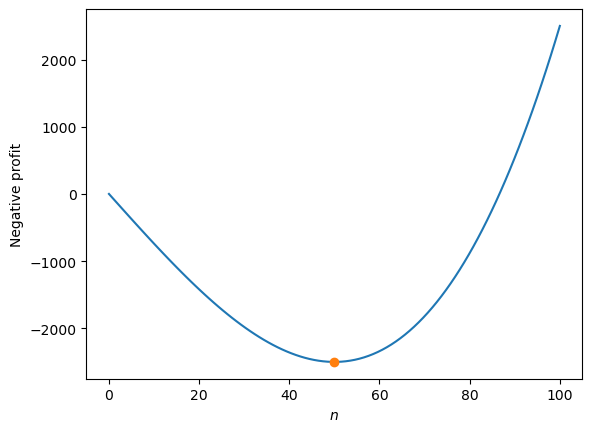

In [25]:
n_range = np.linspace(0,100,100)
negprofit_result = negprofit(n_range)
plt.plot(n_range,negprofit_result)
plt.plot(result.x,result.fun,'o');
plt.xlabel('$n$')
plt.ylabel('Negative profit');